INTRODUCTION TO TIME SERIES FORECASTING USING ARIMA, EXPONENTIAL SMOOTHING AND SIMPLE MOVING AVERAGE

Today
Introduction to Time Series Forecasting

Time Series Forecasting involves predicting future values based on previously observed values. It is widely used in domains such as finance, economics, weather prediction, inventory control, and more. A time series is a sequence of data points collected at consistent time intervals—hourly, daily, monthly, etc.

There are several statistical and machine learning methods for forecasting, but in this introduction, we’ll focus on three classical techniques:
	•	Moving Average (MA)
	•	Exponential Smoothing (ES)
	•	ARIMA (AutoRegressive Integrated Moving Average)

⸻

Moving Average (MA)
The Moving Average method smooths out short-term fluctuations and highlights longer-term trends or cycles. It works by taking the average of the last n observations in the series.

Types:
	•	Simple Moving Average (SMA): Average of a fixed number of past observations.
	•	Weighted Moving Average (WMA): Recent observations are given more weight than older ones.

Use Case:

Good for smoothing noisy data and identifying trends, but limited for actual forecasting unless extended.

⸻

Exponential Smoothing (ES)
Exponential Smoothing assigns exponentially decreasing weights to past observations. Recent values influence the forecast more than older values.

Types:
	•	Single Exponential Smoothing (SES): For series with no trend or seasonality.
	•	Double Exponential Smoothing: Accounts for trend.
	•	Triple Exponential Smoothing (Holt-Winters): Accounts for trend and seasonality.

Key Components:
	•	Level: Base value of the series.
	•	Trend: Direction of change.
	•	Seasonality: Repeating short-term cycle.

Use Case:

Suitable for data with trends and seasonal patterns, and simple to implement.

⸻

ARIMA (AutoRegressive Integrated Moving Average)
ARIMA is a powerful statistical model that combines:
	•	Autoregression (AR): Forecasts using a linear combination of past values.
	•	Integration (I): Differencing the data to make it stationary.
	•	Moving Average (MA): Uses past forecast errors to improve predictions.

Notation: ARIMA(p, d, q)
	•	p: Number of AR terms (lags of past values)
	•	d: Number of differencing steps needed to make the series stationary
	•	q: Number of MA terms (lags of forecast errors)

Stationarity:

A key requirement for ARIMA is stationarity—the statistical properties of the series like mean and variance must be constant over time.

Use Case:

Ideal for non-seasonal and seasonal time series forecasting when the data shows trends or cycles.

Objectives of Time Series Forecasting

Predict Future Values
	•	Use historical data to make informed predictions about future values.
	•	Anticipate demand, sales, stock prices, or other time-dependent variables.

Identify and Understand Patterns
	•	Detect trends, seasonality, and cyclic behavior in the data.
	•	Use this understanding to choose the appropriate forecasting method.

Improve Decision-Making
	•	Support strategic planning by forecasting resource needs, inventory, production, staffing, and budgets.
	•	Reduce uncertainty in business and operational planning.

Compare Forecasting Methods
	•	Evaluate the performance of Moving Average, Exponential Smoothing, and ARIMA models.
	•	Select the most suitable method based on data characteristics (e.g., presence of trend or seasonality).

Achieve Model Accuracy
	•	Minimize forecasting errors (e.g., MAE, RMSE, MAPE) through proper model selection and tuning.
	•	Validate models using back-testing or cross-validation techniques.

Handle Real-World Time Series Challenges
	•	Deal with missing data, outliers, and non-stationarity in real-world datasets.
	•	Transform and prepare time series data for accurate modeling.

Automate Forecasting Tasks
	•	Build models that can be automated for regular, repeated forecasting needs in business and scientific settings.

In [1]:
#import the libraries
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [6]:
import sys
print(sys.executable)

C:\Users\USER\anaconda3\envs\python\python.exe


In [3]:
pip install ipython-sql

In [ ]:
### loading the sql extension.

In [3]:
%load_ext sql

In [ ]:
### loading the northwind dataset into sql

In [5]:
sql sqlite:///Northwind.db

'Connected: @Northwind.db'

In [ ]:
### connecting the sqlite to the northwind database

In [13]:
conn = sqlite3.connect("Northwind.db")

In [15]:
%%sql
SELECT
    CAST(strftime('%Y', o.OrderDate) AS INTEGER) AS Year,
    CAST(strftime('%m', o.OrderDate) AS INTEGER) AS Month,
    CAST(strftime('%d', o.OrderDate) AS INTEGER) AS Day
FROM Orders AS o;

 * sqlite:///Northwind.db
Done.


Year,Month,Day
1996,7,4
1996,7,5
1996,7,8
1996,7,8
1996,7,9
1996,7,10
1996,7,11
1996,7,12
1996,7,15
1996,7,16


In [ ]:
### joining the orderdate and orderid to merge the year, month and total sales in a single table

In [17]:
%%sql
SELECT 
    CAST(strftime('%Y', o.OrderDate) AS INTEGER) AS SalesYear,
    CAST(strftime('%m', o.OrderDate) AS INTEGER) AS SalesMonth,
    SUM(
        od.Quantity 
        * Unitprice 
        * (1 - od.Discount)
    )                                            AS TotalSales
FROM Orders AS o
JOIN OrderDetails AS od 
    ON o.OrderID = od.OrderID
GROUP BY 
         SalesYear, 
         SalesMonth
ORDER BY SalesYear, SalesMonth
;

 * sqlite:///Northwind.db
Done.


SalesYear,SalesMonth,TotalSales
1996,7,30192.1
1996,8,26609.4
1996,9,27636.0
1996,10,41203.6
1996,11,49704.0
1996,12,50953.4
1997,1,66692.8
1997,2,41207.2
1997,3,39979.9
1997,4,55699.39


In [ ]:
### reading the sql query in a dataframe

In [19]:

sql_query = """SELECT 
    CAST(strftime('%Y', o.OrderDate) AS INTEGER) AS SalesYear,
    CAST(strftime('%m', o.OrderDate) AS INTEGER) AS SalesMonth,
    SUM(
        od.Quantity 
        * Unitprice 
        * (1 - od.Discount)
    )                                            AS TotalSales
FROM Orders AS o
JOIN OrderDetails AS od 
    ON o.OrderID = od.OrderID
GROUP BY 
         SalesYear, 
         SalesMonth
ORDER BY SalesYear, SalesMonth
;"""
df = pd.read_sql_query(sql_query, conn)

In [21]:
df

,SalesYear,SalesMonth,TotalSales
0,1996,7,30192.10
1,1996,8,26609.40
2,1996,9,27636.00
3,1996,10,41203.60
4,1996,11,49704.00
5,1996,12,50953.40
6,1997,1,66692.80
7,1997,2,41207.20
8,1997,3,39979.90
9,1997,4,55699.39


In [ ]:
### comparing the 3 model such as ARIMA MODEL,Exponential Smoothing and Moving Average to predict the future forecasting and knowing which one works well for long term forecasting and short term forecasting

In [23]:
df = pd.DataFrame(df)

In [25]:
print(df.columns)

Index(['SalesYear', 'SalesMonth', 'TotalSales'], dtype='object')


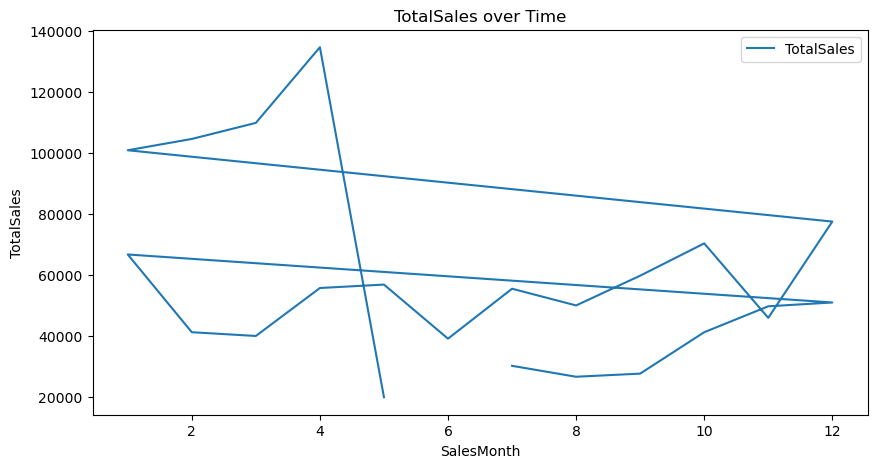

In [25]:
plt.figure(figsize =(10,5))
plt.plot(df['SalesMonth'], df['TotalSales'], label = "TotalSales")
plt.title("TotalSales over Time")
plt.xlabel('SalesMonth')
plt.ylabel('TotalSales')
plt.legend()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["TotalSales"])
print(f"ADF Statistics:{result[0]}")
print(f"p-Value:{result[1]}")

ADF Statistics:-7.334772685709099
p-Value:1.1038882408917799e-10


In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

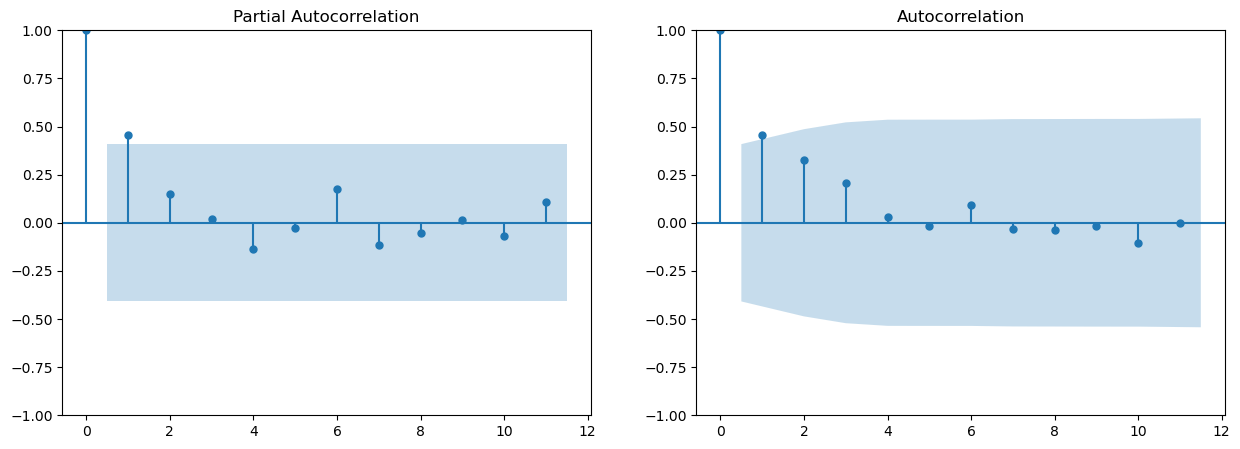

In [33]:

fig, axes = plt.subplots(1,2, figsize=(15,5))
plot_pacf(df["TotalSales"].dropna(), ax=axes[0])
plot_acf(df["TotalSales"].dropna(),ax=axes[1])
plt.show()

In [35]:
model = ARIMA(df["TotalSales"],order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             TotalSales   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -255.708
Date:                Thu, 22 May 2025   AIC                            515.417
Time:                        02:26:51   BIC                            517.599
Sample:                             0   HQIC                           515.931
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6012      0.252     -2.381      0.017      -1.096      -0.106
sigma2      7.523e+08   4.15e-10   1.81e+18      0.000    7.52e+08    7.52e+08
Ljung-Box (L1) (Q):                   0.36   Jarque-

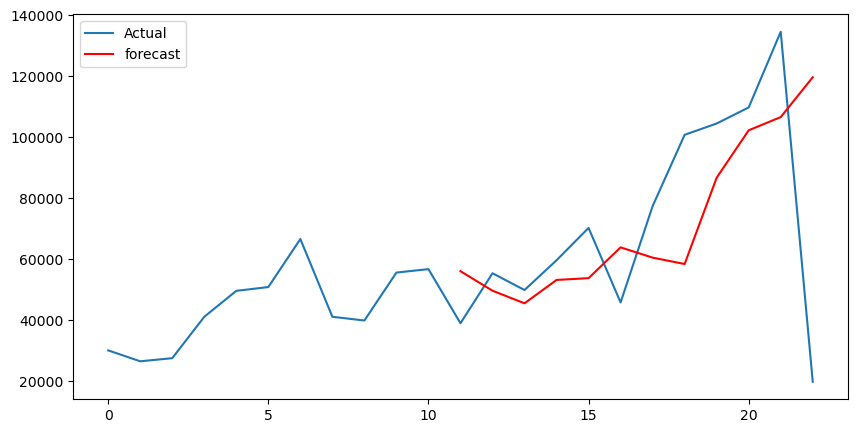

In [37]:
df["forecast"] = model_fit.predict(start=len(df)-12, end=len(df)-1)
plt.figure(figsize=(10,5))
plt.plot(df["TotalSales"], label="Actual")
plt.plot(df["forecast"], label="forecast", color='red')
plt.legend()
plt.show()

In [39]:
mse = mean_squared_error(df['TotalSales'][-12:], df['forecast'][-12:])
rmse = np.sqrt(mse)
print(f"mean_squared_error:{mse}")
print(f"root_mean_square_error:{rmse}")

mean_squared_error:1181468081.2279809
root_mean_square_error:34372.49018078238


In [ ]:
#simple moving average (SMA) to build model that works well and predict 

In [41]:
df['MA_12'] = df['TotalSales'].rolling(window=12).mean()

In [43]:
forecast = df['MA_12'].iloc[-1]
print("next_period_forecast:", forecast)

next_period_forecast: 72313.09166666666


In [45]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
weights_sum = sum(weights)

In [47]:
df['WMA_12'] = df['TotalSales'].rolling(window=12).apply(lambda x: np.sum (x * weights) / weights_sum, raw=True)

In [49]:
df['MA_12_pred'] = df['MA_12'].shift(1)

In [51]:
y_true = df['TotalSales'].dropna()
y_pred = df['MA_12_pred'].dropna()

In [53]:
print("length of y_true:", len(y_true))
print("length of y_pred:", len(y_pred))

length of y_true: 23
length of y_pred: 11


In [55]:
print(y_true.index[:10])
print(y_pred.index[:10])

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64')


In [57]:
y_true = df['TotalSales'].dropna()
y_pred = df['MA_12_pred'].dropna()

In [59]:
print(f"initial lengths ->y_true:{len(y_true)}, y_pred: {len(y_pred)}")

initial lengths ->y_true:23, y_pred: 11


In [61]:
y_true, y_pred = y_true.align(y_pred, join ='inner')

In [63]:
print(f"After alignment ->y_true:{len(y_true)}, y_pred: {len(y_pred)}")

After alignment ->y_true:11, y_pred: 11


In [65]:
print(f"NaNs in y_true:{y_true.isna().sum}, NaNs in y_pred:{y_pred.isna().sum()}")

NaNs in y_true:<bound method Series.sum of 12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: TotalSales, dtype: bool>, NaNs in y_pred:0


In [67]:
y_true = y_true.to_numpy()
y_pred = y_pred.to_numpy()

In [69]:
print(f"final lengths -> y_true: {len(y_true)}, y_pred: {len(y_pred)}")

final lengths -> y_true: 11, y_pred: 11


In [71]:
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]

In [73]:
print(f"Trimmed lengths ->y_true:{len(y_true)}, y_pred: {len(y_pred)}")

Trimmed lengths ->y_true:11, y_pred: 11


In [75]:
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

MAE: 30928.785151515152


In [119]:
# simple Exponential Smoothing  

In [27]:
ses_model = SimpleExpSmoothing(df['TotalSales']).fit(smoothing_level=0.2, optimized=True)

C:\Users\USER\anaconda3\envs\python\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [29]:
df['SES_Forecast'] = ses_model.fittedvalues

In [31]:
future_forecast = ses_model.forecast(12)

In [35]:
df['TotalSales'] = pd.to_numeric(df['TotalSales'], errors='coerce')
print(df['TotalSales'].isnull().sum())
print(len(df['TotalSales']))
df['TotalSales'] = df['TotalSales'].ffill()
if len(df['TotalSales']) <= 24:
    model = ExponentialSmoothing(df['TotalSales'], trend='add', seasonal=None)
    fit = model.fit(optimized=True)
else:
    model = ExponentialSmoothing(df['TotalSales'], trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit()
    
df['HW_Forecast'] = fit.fittedvalues

0
23


C:\Users\USER\anaconda3\envs\python\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [43]:
from statsmodels.tsa.holtwinters import Holt

In [53]:
holt_model = Holt(df['TotalSales'])
holt_fit = holt_model.fit()

C:\Users\USER\anaconda3\envs\python\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [55]:
df['Holt_forecast'] = holt_fit.fittedvalues

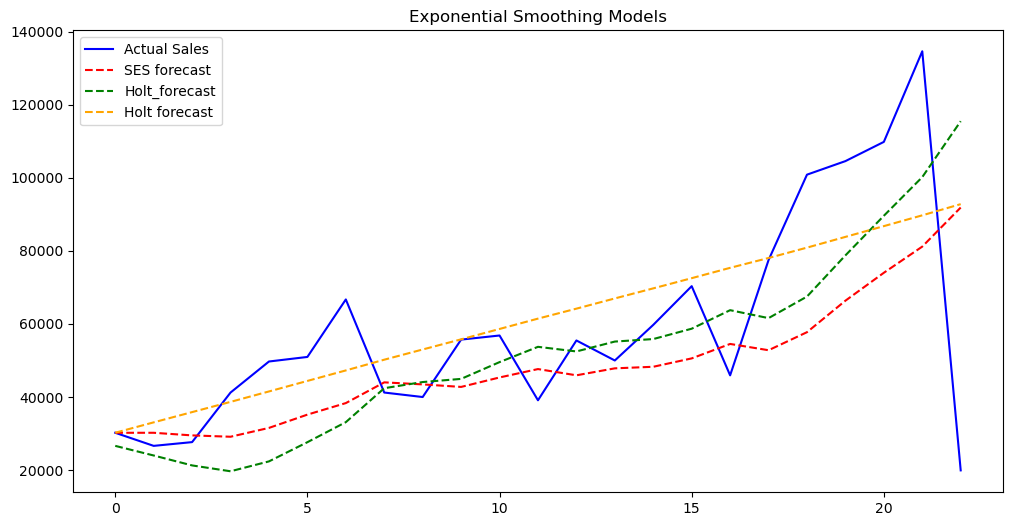

In [65]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['TotalSales'], label='Actual Sales', color='blue')
plt.plot(df.index, df['SES_Forecast'], label='SES forecast', color='red', linestyle='dashed')
plt.plot(df.index, df['Holt_forecast'], label='Holt_forecast', color='green', linestyle='dashed')
plt.plot(df.index, df['HW_Forecast'], label='Holt forecast', color='orange', linestyle='dashed')
plt.legend()
plt.title('Exponential Smoothing Models')
plt.show()

In [73]:
MSE = mean_squared_error(df['TotalSales'], df['HW_Forecast'])
RMSE = np.sqrt(MSE)

In [75]:
print(df.columns)

Index(['SalesYear', 'SalesMonth', 'TotalSales', 'SES_Forecast', 'HW_Forecast',
       'Holt_forecast'],
      dtype='object')


In [79]:
print(f"mean_squared_error: {MSE}")
print(f"root_mean_squared_error:{RMSE}")

mean_squared_error: 494908888.0572185
root_mean_squared_error:22246.547778413136


CONCLUSION :
 ARIMA (AutoRegressive Integrated Moving Average)
                    Uses
	•	Time series with trend, seasonality (if extended to SARIMA), and autocorrelation
	•	Medium to complex patterns

           Benefits of ARIMA(AutoRegressive Integrated Moving Average)
	•	Very powerful for stationary and non-stationary data (when differencing is applied)
	•	Can model trend and lags
	•	SARIMA handles seasonality

            Delimitations of ARIMA(AutoRegressive Integrated Moving Average)
	•	Requires the data to be stationary
	•	Can be complex to tune (requires p, d, q selection)
	•	Needs more preprocessing (differencing, diagnostics)
ARIMA is best when accuracy and trend modeling are important, especially for longer timeframes or when there’s a consistent pattern in past data.

Exponential Smoothing (ETS - Simple, Double, or Triple)
                Uses
	•	Time series with trend and/or seasonality
	•	Short-to-medium term forecasting
                Benefits of Exponential Smoothing (ETS - Simple, Double, or Triple)
	•	Smooths noise and gives weighted importance to recent observations
	•	Easy to implement
	•	Triple Exponential Smoothing (Holt-Winters) handles trend and seasonality
                Delimitations of Exponential Smoothing (ETS - Simple, Double, or Triple)
	•	Can lag in sudden changes
	•	Not as flexible as ARIMA in modeling complex autocorrelation
Exponential Smoothing is best for consistent time series with seasonality, especially if you want a simpler and interpretable model without much tuning.

Moving Average
                Uses
	•	Very simple data smoothing or short-term forecasting
	•	Exploratory analysis
                Benefits of Moving Average
	•	Easy to understand and implement
	•	Helps remove noise
                Delimitation of Moving Average
	•	Not predictive in nature — doesn’t model trend or seasonality
	•	Can lag significantly behind real values
	•	Poor performance in dynamic data
 Moving Average is best for smoothing and visualizing trends, not ideal for accurate forecasting on its own.